In [32]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [33]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [34]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [35]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [36]:
tf.keras.backend.clear_session()

In [37]:
subject = 'Goiás - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [38]:
data = pd.read_csv('2003_raw_Goiás_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Goiás - PIB - Per Capita,Goiás - PIB - Preços de Mercado,Goiás - PIB - Estadual,Goiás - PIB - Construção Civil,Goiás - População,Goiás - INCC (%),Goiás - IPCA - Variação mensal durante o Plano Real (%),Goiás - IGP-DI,Goiás - Taxa Selic (%),Goiás - IDH - Longevidade,Goiás - IDH - Renda,Goiás - IDH - Educação,Goiás - NFSP - Fluxo Mensal (Milhões de reais),Goiás - Estoque liquido de capital fixo - (R$),Goiás - Desemprego,Goiás - Produção de Cimento (t),Goiás - Valor,Goiás - Consumo de Cimento (t)
0,2003-01-01,5.405587e+06,2.845427e+06,1.037474,4.096599e+06,5210335.0,1.70,12.53,2.70,0.082293,0.773,0.686,0.439,3.46,6.098524e+06,6.903738,NaN,0.30,97447.0
1,2003-02-01,5.405587e+06,2.845427e+06,1.037474,4.096599e+06,5210335.0,1.51,2.25,2.17,0.088771,0.773,0.686,0.439,3.59,6.172460e+06,6.903738,NaN,0.32,97256.0
2,2003-03-01,5.405587e+06,2.845427e+06,1.037474,4.096599e+06,5210335.0,1.39,3.86,1.59,0.090733,0.773,0.686,0.439,3.84,6.172460e+06,6.903738,NaN,0.33,101442.0
3,2003-04-01,5.405587e+06,2.845427e+06,1.037474,4.096599e+06,5210335.0,1.38,5.13,1.66,0.092749,0.773,0.686,0.439,3.95,6.172460e+06,6.903738,83636.0,0.32,98217.0
4,2003-05-01,5.405587e+06,2.845427e+06,1.037474,4.096599e+06,5210335.0,0.90,6.15,0.41,0.092758,0.773,0.686,0.439,4.06,6.172460e+06,6.903738,88915.0,0.32,112540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,8.587970e+06,1.449085e+07,1.240828,5.366033e+06,6921161.0,0.58,2.42,-0.01,0.024620,0.820,0.750,0.740,0.69,7.827728e+06,12.300000,177394.0,0.39,226996.0
200,2019-09-01,8.587970e+06,1.449085e+07,1.240828,5.366033e+06,6921161.0,0.42,2.54,-0.51,0.022751,0.820,0.750,0.740,0.62,7.827728e+06,12.000000,25338.0,0.39,218141.0
201,2019-10-01,8.587970e+06,1.449085e+07,1.240828,5.366033e+06,6921161.0,0.46,2.49,0.50,0.022035,0.820,0.750,0.740,0.59,7.827728e+06,11.900000,236610.0,0.39,234939.0
202,2019-11-01,8.587970e+06,1.449085e+07,1.240828,5.366033e+06,6921161.0,0.18,2.60,0.55,0.020790,0.820,0.750,0.740,0.57,7.827728e+06,11.700000,108020.0,0.39,199619.0


In [39]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      121.831
1      115.210
2      122.721
3      130.262
4      139.268
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Goiás - Consumo de Cimento (t), Length: 204, dtype: float64

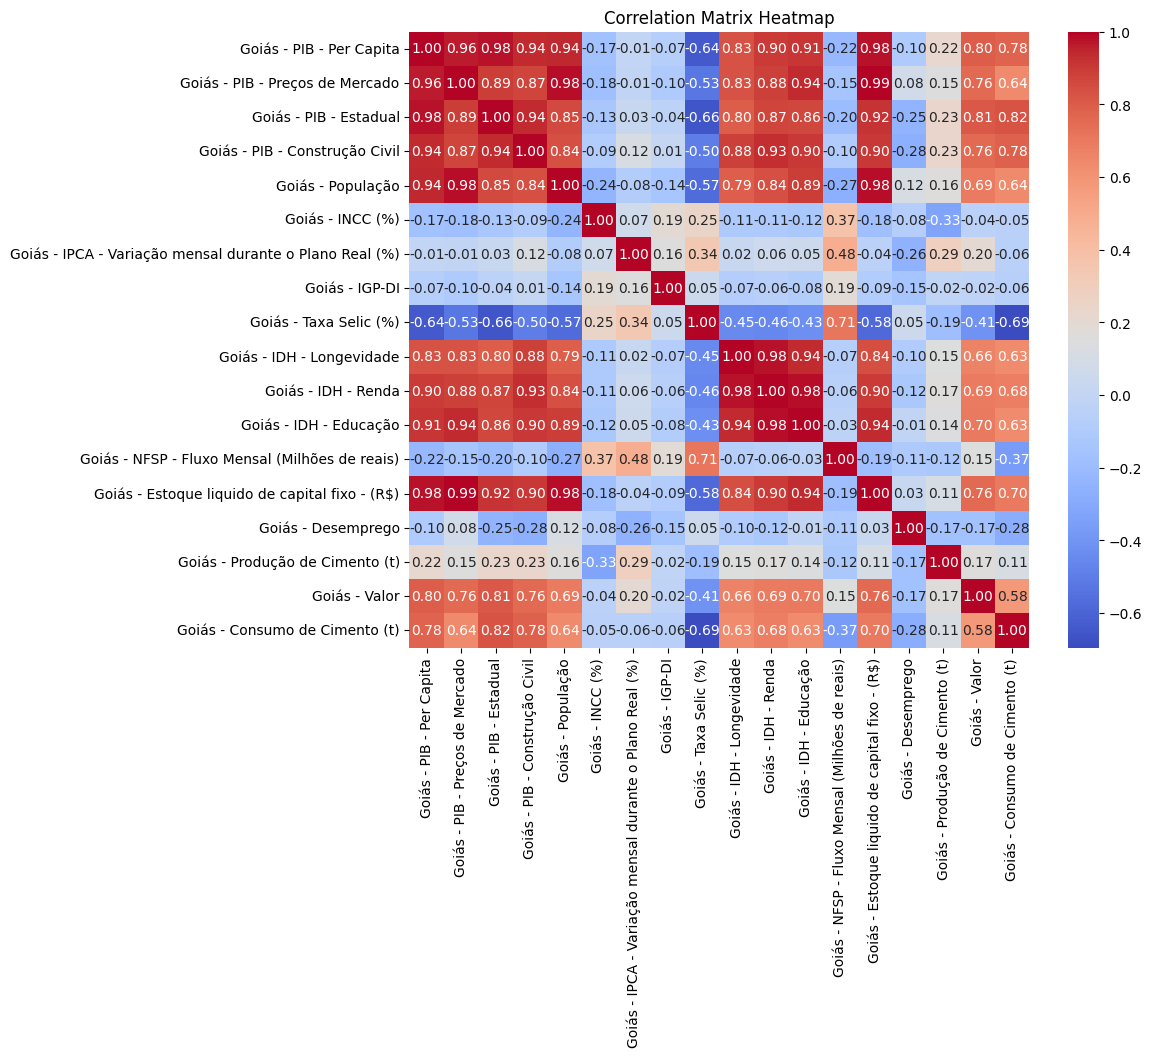

In [40]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [41]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Goiás - PIB - Per Capita,Goiás - PIB - Preços de Mercado,Goiás - PIB - Estadual,Goiás - PIB - Construção Civil,Goiás - População,Goiás - INCC (%),Goiás - IPCA - Variação mensal durante o Plano Real (%),Goiás - IGP-DI,Goiás - Taxa Selic (%),Goiás - IDH - Longevidade,Goiás - IDH - Renda,Goiás - IDH - Educação,Goiás - NFSP - Fluxo Mensal (Milhões de reais),Goiás - Estoque liquido de capital fixo - (R$),Goiás - Desemprego,Goiás - Produção de Cimento (t),Goiás - Valor
0,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.998868,4.052332,3.466715,2.303195,-0.913558,-0.935276,-0.918759,3.108599,-1.539424,-0.710259,-1.000000,-0.164810
1,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.647487,-0.596188,2.630940,2.745235,-0.913558,-0.935276,-0.918759,3.275709,-1.411460,-0.710259,-1.000000,0.156971
2,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.425561,0.131839,1.716318,2.879123,-0.913558,-0.935276,-0.918759,3.597074,-1.411460,-0.710259,-1.000000,0.317861
3,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.407068,0.706121,1.826703,3.016721,-0.913558,-0.935276,-0.918759,3.738475,-1.411460,-0.710259,-0.483623,0.156971
4,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,0.519367,1.167355,-0.144465,3.017322,-0.913558,-0.935276,-0.918759,3.879875,-1.411460,-0.710259,-0.452426,0.156971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.969978,1.671989,0.480062,0.286400,1.651302,-0.590259,-0.966985,-1.264088,-0.729479,1.144137,1.007220,1.437487,-0.374997,1.441346,2.685447,0.193445,0.961423
176,0.969978,1.671989,0.480062,0.286400,1.651302,-0.479297,-0.881068,-0.412544,-0.941281,1.144137,1.007220,1.437487,-0.439270,1.441346,2.685447,-0.801533,0.961423
177,0.969978,1.671989,0.480062,0.286400,1.651302,-1.034110,-0.808718,0.186692,-1.140710,1.144137,1.007220,1.437487,-0.503543,1.441346,2.685447,0.158814,0.961423
178,0.969978,1.671989,0.480062,0.286400,1.651302,-0.571766,-0.614276,-0.633314,-1.226481,1.144137,1.007220,1.437487,-0.503543,1.441346,2.753412,-0.349850,0.961423


In [42]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Goiás - PIB - Per Capita,Goiás - PIB - Preços de Mercado,Goiás - PIB - Estadual,Goiás - PIB - Construção Civil,Goiás - População,Goiás - INCC (%),Goiás - IPCA - Variação mensal durante o Plano Real (%),Goiás - IGP-DI,Goiás - Taxa Selic (%),Goiás - IDH - Longevidade,Goiás - IDH - Renda,Goiás - IDH - Educação,Goiás - NFSP - Fluxo Mensal (Milhões de reais),Goiás - Estoque liquido de capital fixo - (R$),Goiás - Desemprego,Goiás - Produção de Cimento (t),Goiás - Valor
0,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.998868,4.052332,3.466715,2.303195,-0.913558,-0.935276,-0.918759,3.108599,-1.539424,-0.710259,-1.000000,-0.164810
1,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.647487,-0.596188,2.630940,2.745235,-0.913558,-0.935276,-0.918759,3.275709,-1.411460,-0.710259,-1.000000,0.156971
2,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.425561,0.131839,1.716318,2.879123,-0.913558,-0.935276,-0.918759,3.597074,-1.411460,-0.710259,-1.000000,0.317861
3,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,1.407068,0.706121,1.826703,3.016721,-0.913558,-0.935276,-0.918759,3.738475,-1.411460,-0.710259,-0.483623,0.156971
4,-1.465165,-1.316037,-1.291747,-0.971634,-1.651575,0.519367,1.167355,-0.144465,3.017322,-0.913558,-0.935276,-0.918759,3.879875,-1.411460,-0.710259,-0.452426,0.156971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.173079,1.496067,0.892404,1.008298,1.461928,-0.238878,0.629248,-1.406012,0.272188,1.144137,1.079165,1.210196,0.794771,1.416222,0.646499,-1.000000,1.080482
164,1.173079,1.496067,0.892404,1.008298,1.461928,-0.608753,0.837256,-0.112926,0.272188,1.144137,1.079165,1.210196,0.730498,1.416222,0.714464,-1.000000,1.080482
165,1.173079,1.496067,0.892404,1.008298,1.461928,-0.534778,0.877953,-0.743700,0.272188,1.144137,1.079165,1.210196,0.743353,1.416222,0.782429,-1.000000,1.080482
166,1.173079,1.496067,0.892404,1.008298,1.461928,-0.756703,1.000045,-0.586006,0.248413,1.144137,1.079165,1.210196,0.614807,1.416222,0.782429,-1.000000,1.080482


In [43]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      121.831
1      115.210
2      122.721
3      130.262
4      139.268
        ...   
163    224.270
164    213.871
165    211.066
166    182.899
167    159.002
Name: Goiás - Consumo de Cimento (t), Length: 168, dtype: float64

In [44]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [45]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [46]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Goiás - PIB - Per Capita,Goiás - PIB - Preços de Mercado,Goiás - PIB - Estadual,Goiás - PIB - Construção Civil,Goiás - População,Goiás - INCC (%),Goiás - IPCA - Variação mensal durante o Plano Real (%),Goiás - IGP-DI,Goiás - Taxa Selic (%),Goiás - IDH - Longevidade,Goiás - IDH - Renda,Goiás - IDH - Educação,Goiás - NFSP - Fluxo Mensal (Milhões de reais),Goiás - Estoque liquido de capital fixo - (R$),Goiás - Desemprego,Goiás - Produção de Cimento (t),Goiás - Valor
132,1.201797,1.011183,1.202942,1.236357,1.069205,-0.960135,1.058830,0.297077,-0.755853,0.706329,1.079165,1.134433,-0.285015,0.834026,-0.440940,3.558564,0.800532
133,1.201797,1.011183,1.202942,1.236357,1.069205,0.482379,-1.364912,-0.160234,-0.688658,0.706329,1.079165,1.134433,-0.349288,1.129318,-0.101115,-1.000000,0.800532
134,1.201797,1.011183,1.202942,1.236357,1.069205,-0.534778,-1.052901,0.549386,-0.626634,0.706329,1.079165,1.134433,-0.374997,1.129318,0.102780,-1.000000,0.800532
135,1.201797,1.011183,1.202942,1.236357,1.069205,-0.627247,-0.627842,1.542855,-0.571481,0.706329,1.079165,1.134433,-0.259306,1.129318,-0.033150,-1.000000,0.639642
136,1.201797,1.011183,1.202942,1.236357,1.069205,0.482379,-0.320352,-0.081387,-0.516512,0.706329,1.079165,1.134433,-0.053632,1.129318,-0.169080,-1.000000,0.639642
137,1.201797,1.011183,1.202942,1.236357,1.069205,2.646150,-0.107822,-1.500628,-0.510405,0.706329,1.079165,1.134433,0.023495,1.129318,-0.305010,-1.000000,0.639642
138,1.201797,1.011183,1.202942,1.236357,1.069205,0.075516,0.082098,-1.784477,-0.510405,0.706329,1.079165,1.134433,-0.002214,1.129318,-0.372975,-1.000000,0.639642
139,1.201797,1.011183,1.202942,1.236357,1.069205,0.241960,0.086620,-1.658322,-0.510405,0.706329,1.079165,1.134433,-0.143614,1.129318,-0.508905,-1.000000,0.800532
140,1.201797,1.011183,1.202942,1.236357,1.069205,-0.997122,0.204189,-0.696392,-0.510054,0.706329,1.079165,1.134433,-0.182178,1.129318,-0.644834,-1.000000,0.800532
141,1.201797,1.011183,1.202942,1.236357,1.069205,-0.867666,0.470982,-0.759469,-0.510405,0.706329,1.079165,1.134433,-0.105051,1.129318,-0.780764,-1.000000,0.800532


In [47]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [48]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [49]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [50]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [51]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[3507019960, 2557264836, 246646477, 1475454225, 3842957061, 4258042478, 4130398114, 1231053386, 2091919532, 2458628014]


Step: 0 ___________________________________________
val_loss: 328.9134216308594
winner_seed: 3507019960


Step: 1 ___________________________________________
val_loss: 353.6739807128906


Step: 2 ___________________________________________
val_loss: 353.07037353515625


Step: 3 ___________________________________________
val_loss: 264.83184814453125
winner_seed: 1475454225


Step: 4 ___________________________________________
val_loss: 358.30084228515625


Step: 5 ___________________________________________
val_loss: 376.35540771484375


Step: 6 ___________________________________________
val_loss: 357.6924743652344


Step: 7 ___________________________________________
val_loss: 332.0450744628906


Step: 8 ___________________________________________
val_loss: 356.4140930175781


Step: 9 ___________________________________________
val_loss: 372.01202392578125


final

In [52]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 281ms/step - loss: 45425.9531 - val_loss: 4288.4458
Epoch 2/10000
4/4 [==============================] - 0s 9ms/step - loss: 6339.5972 - val_loss: 1351.8545
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 1853.7031 - val_loss: 2248.8079
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 1746.6144 - val_loss: 2544.9124
Epoch 5/10000
4/4 [==============================] - 0s 9ms/step - loss: 1683.7396 - val_loss: 2687.6833
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 2583.8147 - val_loss: 827.0191
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 2196.5967 - val_loss: 2667.1479
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 1696.4594 - val_loss: 2506.6863
Epoch 9/10000
4/4 [==============================] - 0s 10ms/step - loss: 1648.7646 - val_loss: 2952.2639
Epoch 10/10000
4/4 [=============================

Epoch 79/10000
4/4 [==============================] - 0s 10ms/step - loss: 420.0726 - val_loss: 869.8370
Epoch 80/10000
4/4 [==============================] - 0s 12ms/step - loss: 481.8411 - val_loss: 494.3655
Epoch 81/10000
4/4 [==============================] - 0s 9ms/step - loss: 430.4462 - val_loss: 572.4031
Epoch 82/10000
4/4 [==============================] - 0s 9ms/step - loss: 423.5966 - val_loss: 500.8464
Epoch 83/10000
4/4 [==============================] - 0s 10ms/step - loss: 434.6924 - val_loss: 494.3205
Epoch 84/10000
4/4 [==============================] - 0s 10ms/step - loss: 420.6055 - val_loss: 527.7418
Epoch 85/10000
4/4 [==============================] - 0s 10ms/step - loss: 373.9652 - val_loss: 571.4033
Epoch 86/10000
4/4 [==============================] - 0s 10ms/step - loss: 389.0305 - val_loss: 403.5621
Epoch 87/10000
4/4 [==============================] - 0s 10ms/step - loss: 381.1642 - val_loss: 915.8743
Epoch 88/10000
4/4 [==============================] - 0s 

Epoch 157/10000
4/4 [==============================] - 0s 9ms/step - loss: 254.6230 - val_loss: 357.9471
Epoch 158/10000
4/4 [==============================] - 0s 9ms/step - loss: 247.8194 - val_loss: 342.0798
Epoch 159/10000
4/4 [==============================] - 0s 8ms/step - loss: 225.9557 - val_loss: 402.7545
Epoch 160/10000
4/4 [==============================] - 0s 8ms/step - loss: 218.7969 - val_loss: 1061.2896
Epoch 161/10000
4/4 [==============================] - 0s 8ms/step - loss: 271.1974 - val_loss: 906.5235
Epoch 162/10000
4/4 [==============================] - 0s 8ms/step - loss: 219.3212 - val_loss: 413.9868
Epoch 163/10000
4/4 [==============================] - 0s 9ms/step - loss: 221.7160 - val_loss: 1041.9215
Epoch 164/10000
4/4 [==============================] - 0s 8ms/step - loss: 230.7505 - val_loss: 461.2189
Epoch 165/10000
4/4 [==============================] - 0s 9ms/step - loss: 187.9479 - val_loss: 514.0693
Epoch 166/10000
4/4 [==============================] 

Epoch 235/10000
4/4 [==============================] - 0s 10ms/step - loss: 121.6072 - val_loss: 360.9567
Epoch 236/10000
4/4 [==============================] - 0s 9ms/step - loss: 156.8557 - val_loss: 410.6281
Epoch 237/10000
4/4 [==============================] - 0s 10ms/step - loss: 150.6324 - val_loss: 372.5902
Epoch 238/10000
4/4 [==============================] - 0s 10ms/step - loss: 151.9059 - val_loss: 430.5514
Epoch 239/10000
4/4 [==============================] - 0s 10ms/step - loss: 166.3084 - val_loss: 366.5290
Epoch 240/10000
4/4 [==============================] - 0s 9ms/step - loss: 147.4255 - val_loss: 366.4170
Epoch 241/10000
4/4 [==============================] - 0s 9ms/step - loss: 161.4672 - val_loss: 358.7874
Epoch 242/10000
4/4 [==============================] - 0s 9ms/step - loss: 171.6361 - val_loss: 408.2865
Epoch 243/10000
4/4 [==============================] - 0s 8ms/step - loss: 150.3438 - val_loss: 338.5743
Epoch 244/10000
4/4 [==============================

4/4 [==============================] - 0s 11ms/step - loss: 115.7726 - val_loss: 420.3602
Epoch 313/10000
4/4 [==============================] - 0s 12ms/step - loss: 116.8181 - val_loss: 468.7195
Epoch 314/10000
4/4 [==============================] - 0s 11ms/step - loss: 110.6999 - val_loss: 359.7183
Epoch 315/10000
4/4 [==============================] - 0s 12ms/step - loss: 114.6575 - val_loss: 432.0357
Epoch 316/10000
4/4 [==============================] - 0s 12ms/step - loss: 117.2736 - val_loss: 386.4731
Epoch 317/10000
4/4 [==============================] - 0s 12ms/step - loss: 132.3284 - val_loss: 512.7911
Epoch 318/10000
4/4 [==============================] - 0s 12ms/step - loss: 151.3635 - val_loss: 385.2267
Epoch 319/10000
4/4 [==============================] - 0s 11ms/step - loss: 116.0696 - val_loss: 385.3557
Epoch 320/10000
4/4 [==============================] - 0s 13ms/step - loss: 123.4884 - val_loss: 444.8109
Epoch 321/10000
4/4 [==============================] - 0s 10ms

Epoch 390/10000
4/4 [==============================] - 0s 9ms/step - loss: 94.4834 - val_loss: 345.0699
Epoch 391/10000
4/4 [==============================] - 0s 8ms/step - loss: 113.9198 - val_loss: 454.7414
Epoch 392/10000
4/4 [==============================] - 0s 10ms/step - loss: 123.0392 - val_loss: 380.2962
Epoch 393/10000
4/4 [==============================] - 0s 10ms/step - loss: 101.9170 - val_loss: 402.0431
Epoch 394/10000
4/4 [==============================] - 0s 9ms/step - loss: 91.6017 - val_loss: 427.6981
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.0244 - val_loss: 371.7235
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step - loss: 102.8657 - val_loss: 427.2431
Epoch 397/10000
4/4 [==============================] - 0s 10ms/step - loss: 104.3217 - val_loss: 353.9046
Epoch 398/10000
4/4 [==============================] - 0s 10ms/step - loss: 100.3743 - val_loss: 342.9406
Epoch 399/10000
4/4 [==============================] -

4/4 [==============================] - 0s 11ms/step - loss: 120.8175 - val_loss: 456.9781
Epoch 469/10000
4/4 [==============================] - 0s 11ms/step - loss: 120.2796 - val_loss: 438.4957
Epoch 470/10000
4/4 [==============================] - 0s 10ms/step - loss: 95.7133 - val_loss: 399.7695
Epoch 471/10000
4/4 [==============================] - 0s 10ms/step - loss: 87.5325 - val_loss: 457.4920
Epoch 472/10000
4/4 [==============================] - 0s 9ms/step - loss: 85.0571 - val_loss: 392.5961
Epoch 473/10000
4/4 [==============================] - 0s 11ms/step - loss: 74.0796 - val_loss: 405.5101
Epoch 474/10000
4/4 [==============================] - 0s 11ms/step - loss: 93.3736 - val_loss: 344.8310
Epoch 475/10000
4/4 [==============================] - 0s 11ms/step - loss: 77.1637 - val_loss: 345.8521
Epoch 476/10000
4/4 [==============================] - 0s 12ms/step - loss: 102.3269 - val_loss: 387.5340
Epoch 477/10000
4/4 [==============================] - 0s 10ms/step -

4/4 [==============================] - 0s 8ms/step - loss: 84.1609 - val_loss: 340.8164
Epoch 547/10000
4/4 [==============================] - 0s 7ms/step - loss: 80.9962 - val_loss: 356.2328
Epoch 548/10000
4/4 [==============================] - 0s 8ms/step - loss: 99.9505 - val_loss: 475.3290
Epoch 549/10000
4/4 [==============================] - 0s 8ms/step - loss: 91.2743 - val_loss: 363.5119
Epoch 550/10000
4/4 [==============================] - 0s 10ms/step - loss: 83.8388 - val_loss: 389.0887
Epoch 551/10000
4/4 [==============================] - 0s 11ms/step - loss: 73.8208 - val_loss: 577.7730
Epoch 552/10000
4/4 [==============================] - 0s 8ms/step - loss: 86.0832 - val_loss: 443.1932
Epoch 553/10000
4/4 [==============================] - 0s 8ms/step - loss: 74.9328 - val_loss: 345.0389
Epoch 554/10000
4/4 [==============================] - 0s 8ms/step - loss: 81.3127 - val_loss: 396.7375
Epoch 555/10000
4/4 [==============================] - 0s 9ms/step - loss: 73.

4/4 [==============================] - 0s 9ms/step - loss: 66.5710 - val_loss: 367.1402
Epoch 625/10000
4/4 [==============================] - 0s 8ms/step - loss: 58.7854 - val_loss: 362.4916
Epoch 626/10000
4/4 [==============================] - 0s 9ms/step - loss: 79.3264 - val_loss: 344.1969
Epoch 627/10000
4/4 [==============================] - 0s 9ms/step - loss: 68.5990 - val_loss: 537.1426
Epoch 628/10000
4/4 [==============================] - 0s 10ms/step - loss: 73.5535 - val_loss: 385.6289
Epoch 629/10000
4/4 [==============================] - 0s 11ms/step - loss: 64.9707 - val_loss: 401.3919
Epoch 630/10000
4/4 [==============================] - 0s 10ms/step - loss: 63.5186 - val_loss: 343.1445
Epoch 631/10000
4/4 [==============================] - 0s 10ms/step - loss: 57.4305 - val_loss: 340.0308
Epoch 632/10000
4/4 [==============================] - 0s 10ms/step - loss: 55.8105 - val_loss: 336.3238
Epoch 633/10000
4/4 [==============================] - 0s 9ms/step - loss: 

Epoch 703/10000
4/4 [==============================] - 0s 9ms/step - loss: 67.1171 - val_loss: 362.1252
Epoch 704/10000
4/4 [==============================] - 0s 9ms/step - loss: 57.2172 - val_loss: 326.0656
Epoch 705/10000
4/4 [==============================] - 0s 9ms/step - loss: 65.7236 - val_loss: 389.5938
Epoch 706/10000
4/4 [==============================] - 0s 10ms/step - loss: 52.1028 - val_loss: 333.0698
Epoch 707/10000
4/4 [==============================] - 0s 9ms/step - loss: 63.7325 - val_loss: 372.1509
Epoch 708/10000
4/4 [==============================] - 0s 9ms/step - loss: 57.5061 - val_loss: 340.6339
Epoch 709/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.8569 - val_loss: 356.3225
Epoch 710/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.7155 - val_loss: 389.3534
Epoch 711/10000
4/4 [==============================] - 0s 8ms/step - loss: 50.4197 - val_loss: 404.3367
Epoch 712/10000
4/4 [==============================] - 0s 9ms/s

4/4 [==============================] - 0s 12ms/step - loss: 55.1879 - val_loss: 383.6943
Epoch 782/10000
4/4 [==============================] - 0s 12ms/step - loss: 57.2656 - val_loss: 389.4678
Epoch 783/10000
4/4 [==============================] - 0s 12ms/step - loss: 58.7559 - val_loss: 305.5981
Epoch 784/10000
4/4 [==============================] - 0s 13ms/step - loss: 60.6278 - val_loss: 362.0085
Epoch 785/10000
4/4 [==============================] - 0s 11ms/step - loss: 54.2049 - val_loss: 361.3274
Epoch 786/10000
4/4 [==============================] - 0s 12ms/step - loss: 51.0357 - val_loss: 317.1479
Epoch 787/10000
4/4 [==============================] - 0s 10ms/step - loss: 67.4107 - val_loss: 289.1916
Epoch 788/10000
4/4 [==============================] - 0s 11ms/step - loss: 50.1005 - val_loss: 445.5564
Epoch 789/10000
4/4 [==============================] - 0s 11ms/step - loss: 61.8160 - val_loss: 289.3659
Epoch 790/10000
4/4 [==============================] - 0s 12ms/step - l

4/4 [==============================] - 0s 10ms/step - loss: 52.6135 - val_loss: 364.9527
Epoch 860/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.9749 - val_loss: 473.9575
Epoch 861/10000
4/4 [==============================] - 0s 10ms/step - loss: 48.3995 - val_loss: 590.1266
Epoch 862/10000
4/4 [==============================] - 0s 9ms/step - loss: 56.9221 - val_loss: 391.2274
Epoch 863/10000
4/4 [==============================] - 0s 9ms/step - loss: 46.7048 - val_loss: 347.5766
Epoch 864/10000
4/4 [==============================] - 0s 9ms/step - loss: 42.5827 - val_loss: 362.0989
Epoch 865/10000
4/4 [==============================] - 0s 8ms/step - loss: 48.5820 - val_loss: 329.7560
Epoch 866/10000
4/4 [==============================] - 0s 8ms/step - loss: 47.0702 - val_loss: 324.4716
Epoch 867/10000
4/4 [==============================] - 0s 8ms/step - loss: 50.7119 - val_loss: 299.2555
Epoch 868/10000
4/4 [==============================] - 0s 9ms/step - loss: 50.

Epoch 938/10000
4/4 [==============================] - 0s 9ms/step - loss: 52.1949 - val_loss: 364.6709
Epoch 939/10000
4/4 [==============================] - 0s 10ms/step - loss: 49.7079 - val_loss: 521.9430
Epoch 940/10000
4/4 [==============================] - 0s 10ms/step - loss: 44.0049 - val_loss: 323.7907
Epoch 941/10000
4/4 [==============================] - 0s 9ms/step - loss: 48.8279 - val_loss: 296.7579
Epoch 942/10000
4/4 [==============================] - 0s 9ms/step - loss: 46.5926 - val_loss: 386.1793
Epoch 943/10000
4/4 [==============================] - 0s 10ms/step - loss: 42.8223 - val_loss: 311.8932
Epoch 944/10000
4/4 [==============================] - 0s 10ms/step - loss: 41.1741 - val_loss: 311.6624
Epoch 945/10000
4/4 [==============================] - 0s 10ms/step - loss: 47.8062 - val_loss: 344.3411
Epoch 946/10000
4/4 [==============================] - 0s 9ms/step - loss: 42.6040 - val_loss: 303.3674
Epoch 947/10000
4/4 [==============================] - 0s 9

4/4 [==============================] - 0s 9ms/step - loss: 39.7481 - val_loss: 290.8512
Epoch 1017/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.5089 - val_loss: 316.7949
Epoch 1018/10000
4/4 [==============================] - 0s 9ms/step - loss: 38.3564 - val_loss: 320.5865
Epoch 1019/10000
4/4 [==============================] - 0s 8ms/step - loss: 48.5897 - val_loss: 300.4617
Epoch 1020/10000
4/4 [==============================] - 0s 8ms/step - loss: 47.4493 - val_loss: 337.4776
Epoch 1021/10000
4/4 [==============================] - 0s 8ms/step - loss: 42.1217 - val_loss: 312.2199
Epoch 1022/10000
4/4 [==============================] - 0s 8ms/step - loss: 39.8105 - val_loss: 327.3329
Epoch 1023/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.9261 - val_loss: 306.6111
Epoch 1024/10000
4/4 [==============================] - 0s 9ms/step - loss: 45.5325 - val_loss: 304.4412
Epoch 1025/10000
4/4 [==============================] - 0s 9ms/step - lo

4/4 [==============================] - 0s 9ms/step - loss: 49.3652 - val_loss: 289.4892
Epoch 1095/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.9955 - val_loss: 324.2849
Epoch 1096/10000
4/4 [==============================] - 0s 9ms/step - loss: 56.5181 - val_loss: 352.7298
Epoch 1097/10000
4/4 [==============================] - 0s 10ms/step - loss: 44.2859 - val_loss: 334.7154
Epoch 1098/10000
4/4 [==============================] - 0s 11ms/step - loss: 41.7927 - val_loss: 333.9871
Epoch 1099/10000
4/4 [==============================] - 0s 10ms/step - loss: 56.6234 - val_loss: 320.7068
Epoch 1100/10000
4/4 [==============================] - 0s 11ms/step - loss: 50.7019 - val_loss: 302.9582
Epoch 1101/10000
4/4 [==============================] - 0s 9ms/step - loss: 47.1025 - val_loss: 314.0191
Epoch 1102/10000
4/4 [==============================] - 0s 10ms/step - loss: 54.0804 - val_loss: 335.9283
Epoch 1103/10000
4/4 [==============================] - 0s 10ms/ste

Epoch 1172/10000
4/4 [==============================] - 0s 11ms/step - loss: 40.2235 - val_loss: 319.7718
Epoch 1173/10000
4/4 [==============================] - 0s 10ms/step - loss: 38.3222 - val_loss: 324.6215
Epoch 1174/10000
4/4 [==============================] - 0s 12ms/step - loss: 43.7236 - val_loss: 307.1490
Epoch 1175/10000
4/4 [==============================] - 0s 10ms/step - loss: 39.5636 - val_loss: 336.4808
Epoch 1176/10000
4/4 [==============================] - 0s 11ms/step - loss: 41.6402 - val_loss: 299.8238
Epoch 1177/10000
4/4 [==============================] - 0s 9ms/step - loss: 42.8690 - val_loss: 308.7663
Epoch 1178/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.9220 - val_loss: 308.7019
Epoch 1179/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.7495 - val_loss: 319.0008
Epoch 1180/10000
4/4 [==============================] - 0s 8ms/step - loss: 36.5459 - val_loss: 330.1252
Epoch 1181/10000
4/4 [============================

4/4 [==============================] - 0s 9ms/step - loss: 41.8984 - val_loss: 308.1745
Epoch 1250/10000
4/4 [==============================] - 0s 9ms/step - loss: 35.9652 - val_loss: 295.9856
Epoch 1251/10000
4/4 [==============================] - 0s 8ms/step - loss: 36.2630 - val_loss: 292.2491
Epoch 1252/10000
4/4 [==============================] - 0s 8ms/step - loss: 60.4819 - val_loss: 283.6525
Epoch 1253/10000
4/4 [==============================] - 0s 9ms/step - loss: 43.3613 - val_loss: 295.3226
Epoch 1254/10000
4/4 [==============================] - 0s 9ms/step - loss: 49.5780 - val_loss: 296.7975
Epoch 1255/10000
4/4 [==============================] - 0s 8ms/step - loss: 45.3058 - val_loss: 296.4959
Epoch 1256/10000
4/4 [==============================] - 0s 8ms/step - loss: 47.4750 - val_loss: 308.3466
Epoch 1257/10000
4/4 [==============================] - 0s 9ms/step - loss: 51.2991 - val_loss: 282.6702
Epoch 1258/10000
4/4 [==============================] - 0s 9ms/step - lo

4/4 [==============================] - 0s 9ms/step - loss: 33.1576 - val_loss: 374.7141
Epoch 1328/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.6994 - val_loss: 324.5415
Epoch 1329/10000
4/4 [==============================] - 0s 10ms/step - loss: 38.7274 - val_loss: 323.1664
Epoch 1330/10000
4/4 [==============================] - 0s 9ms/step - loss: 38.9623 - val_loss: 301.0473
Epoch 1331/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.9387 - val_loss: 328.5341
Epoch 1332/10000
4/4 [==============================] - 0s 11ms/step - loss: 31.7325 - val_loss: 329.3644
Epoch 1333/10000
4/4 [==============================] - 0s 9ms/step - loss: 38.7665 - val_loss: 301.0780
Epoch 1334/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.8273 - val_loss: 291.5416
Epoch 1335/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.4450 - val_loss: 289.7905
Epoch 1336/10000
4/4 [==============================] - 0s 8ms/step - 

In [53]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [54]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 17ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,174.621429,162.510406,182.8927,211.889389,199.426346,191.795746,211.009949,211.75209,204.044006,207.899216,204.586456,211.614349
Target,178.918,161.936,173.792,176.627,207.991,185.784,234.176,226.996,218.141,234.939,199.619,168.797
Error,4.29657,0.574402,9.100693,35.26239,8.564651,6.011749,23.166046,15.243912,14.097,27.03978,4.967453,42.817352


In [55]:
display(mae)
display(mape)

15.9285

0.08145417

In [56]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input.iloc[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [57]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             test_input, 
                                             test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

NameError: name 'test_target' is not defined